# Problema 7.9

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

El comportamiento dinámico de una compleja organización empresarial se puede considerar un sistema de control por retroalimentación. Un modelo sencillo de un sistema de gestión se presneta en la figura adjunta.  La función de transferencia correspondiente a la actividad de gestión de la empresa es $G_c(s) = \frac{k_1}{s}$. La función de transferencia correspondiente a las actividades de ingeniería y producción es $G_p(s) = \frac{k_2}{\tau_p s+1}$. La función de transferencia de la actividad de evaluación de los resultados, $C(s)$, de la empresa es $H(s) = k_4 + k_5 s$. El resultado de la evaluación, $B(s)$, se compara con los objetivos propuestos, $R(s)$, y la diferneica constituye la entrada al bloque de gestión, $G_c$, que dará lugar a la pertinente acción correctora. $D(s)$ representa las perturbaciones que actuan sobre el sistema.

![](./img/prob709.svg)

1. ¿Cuál es la función (en el espacio $s$) que relaciona la salida $C(s)$ con la consigna $R(s)$ y la carga $D(s)$?

2. Calcular el _offset_ si se produce en la consigna una variación de una unidad en forma de escalón.

3. Calcular el _overshoot_ de la respuesta en tiempo real a la variación anterior.

4. ¿Qué sencilla modificación realizaría para mejorar la dinámica de este sistema de control?

Datos:

- $k_1 k_2 = 0.1$
- $\tau_p = 10\text{ meses}$
- $k_4 = 5$
- $k_5 = 7.6$


---

**Solución**

a) La respuesta del lazo de control es:

$$C (s) = \frac{G_p}{1 + G_c G_p H} D (s) + \frac{G_c G_p}{1 + G_c G_p H} R
   (s)$$
   
b) En este apartado hay que considerar que se produce un cambio en escalón unidad para la consigna ($R (s) = U (s)$=$\frac{1}{s}$). En primer lugar hay que encontrar la función de transferencia que relaciona la salida del lazo de control con la consigna:

$$\frac{C}{R} = \frac{G_c G_p}{1 + G_c G_p H} = \frac{\frac{k_1}{s} 
  \frac{k_2}{\tau_p s + 1}}{1 + \frac{k_1 k_2  (k_4 + k_5 s)}{s (\tau_p s +
  1)}} = \frac{0.2}{20 s^2 + 3.52 s + 1}$$
  
El *offset* será:

$$\mathrm{Offset} = \lim_{t \to \infty} (R (t) - C (t)) =
   \lim_{s \to 0} \left( s R (s) - s \frac{C (s)}{R (s)} R
   (s) \right) = 1 - \lim_{s \to 0} s \frac{0.2}{20 s^2 +
   3.52 s + 1}  \frac{1}{s} = 0.8$$
   
c) Para poder calcular el *overshoot* es necesario conocer en primer lugar el coeficiente de amortiguamiento del bucle de control. A partir de la ec. (1) se encuentra que:

$$\left\{\begin{array}{l}
     \tau^2 = 20\\
     2 \tau \zeta = 3.52
   \end{array}\right.$$
   
Resolviendo el sistema de ecuaciones se encuentra que la constante de tiempo es $\tau = 4.4721$ y la constante de amortiguamiento $\zeta = 0.3935$. El *overshoot* es:

$$\mathrm{Overshoot} = \exp \left( - \frac{\pi \zeta}{\sqrt{1 - \zeta^2}}
   \right) = 0.2606$$
   
d) El valor máximo de respuesta del lazo de control para un cambio en la consigna en escalón unidad (tal como se dice en el apartado anterior) es:

$$C_{\max} = A + B$$

Tal como se muestra en la figura siguiente:

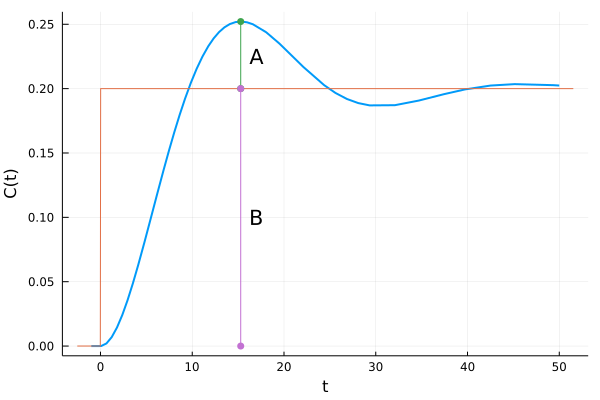

In [1]:
using SymPy, Plots, Roots

t = symbols("t", real=true)
@syms s

# Cambio en la consigna en forma de escalón unidad
ysp = 1/s

# Función de transferencia del lazo de control
G = 0.2/(20s^2 +3.52s+1)

# Respuesta del lazo de control
y_s = G*ysp

y_t = sympy.inverse_laplace_transform(y_s, s, t)

# Para calcular la posición del máximo, se debe cumplir que dy/dt = 0
# Para calcular la derivada y' usaremos la propuedad de la transformada
# de Laplace de la derivada.
# Calcular la derivada de y_t directamente es demasiado complejo, esto es
# mucho más eficaz

dy_s = s*G*ysp
dy_t = sympy.inverse_laplace_transform(dy_s, s, t)

# Valor de y(t -> oo)
B = limit(s*y_s, s, 0)

# Resolvemos la ecuación numéricamente para encontrar la posición del máximo
# y su valor
tmax = fzero(dy_t,[0.1, 20])
ymax = y_t(tmax)


plot(y_t, -1, 50, xlabel="t", ylabel="C(t)", lw=2, legend=false)
plot!(B*Heaviside(t))
plot!([tmax, tmax], [B, ymax], marker=:circle, msw=0, annotations=(17, 0.225, text("A")))
plot!([tmax, tmax], [0, B], marker=:circle, msw=0, annotations=(17, 0.1, text("B")))

# NOTA: El problema 7.10 utiliza un método numérico para calcular la derivada,
# lo que puede ser útil para situaciones en las que no se puede encontrar una solución
# analítica para la derivada

*B* es el valor estacionario de la respuesta del bucle de control:

$$B = \lim_{t \to \infty} C (t) = \lim_{s \to 0} s \frac{C (s)}{R (s)}  \frac{1}{s} = 0.2$$

El valor de $A$ se puede calcular a partir del *overshoot*:

$$\mathrm{Overshoot} = \frac{A}{B}$$

Por tanto:

$$C_{\max} = B (\mathrm{overshoot} + 1) = 0.2521$$

La respuesta de un sistema de segundo orden subamortiguado ($\zeta < 1$) para una entrada en escalón unidad es:

$$y (t) = K_p \left\{ 1 - \frac{1}{\sqrt{1 - \zeta^2}} e^{- \frac{\zeta
   t}{\tau}} \sin \left[ \frac{\sqrt{1 - \zeta^2}}{\tau} t + \mathrm{atan}
   \left( \frac{\sqrt{1 - \zeta^2}}{\zeta} \right) \right] \right\}$$
   
Para encontrar el tiempo ($t_{\max}$) en el que se produce la respuesta
máxima ($C_{\max}$) hay que sustituir $K_p = 0.2$, $\tau = 4.4721$ y
$\zeta = 0.3935$ y resolver la siguiente ecuación:

$$0.2521 = 0.2 [1 - 1.0878 \mathrm{e}^{- 0.088 t_{\max}} \sin(0.2056
   t_{\max} + 1.1664)]$$
   
Se obtiene:

$$t_{\max} = 15.20\ \mathrm{meses}$$

e) La manera más sencilla de mejorar la dinámica de este lazo de control, lo que implica el tener una respuesta más rápida por parte del bucle, es disminuir la constante de tiempo $\tau_p$ de la función de transferencia correspondiente a las actividades de ingeniería y producción. El resultado sería que el sistema se adaptaría más rápidamente a los cambios de consigna y eliminaría con mayor rapidez aquellas perturbaciones que se pudieran producir.